#  Revolutionizing Legal Help in India – Meet Neethi AI!

## A GenAI-Powered Legal Rights Assistant
 
   We're thrilled to introduce Neethi AI – a Gen AI-powered chatbot that empowers citizens with instant legal support in India. Developed as part of our capstone project, it helps you like a real time lawyer.

#### Team Neethi: **Bhaskar | Hariharan G | Anjali | Kowsalya**

## Use Case: Legal Awareness & Assistance for Every Citizen
Access to legal guidance is often restricted due to a lack of awareness, and the complexity of law documents.. Millions of citizens, especially in rural and underrepresented communities, don’t fully understand their legal rights when faced with issues. **NeethiAI** aims to democratize legal help by providing instant, document-aware and  legal support using Generative AI capabilities.

Built with document understanding, Image understanding, and function-calling for a grounded, Google grounding reliable experience.



## Why This is Innovative and Impactful


*  Bridges the gap between common citizens and legal knowledge Uses advanced GenAI + OCR + LLM capabilities to simplify legal processes
*  Automates legal document understanding, summarization, fake notice detection, and drafting of legal actions
*  Supports direct legal queries even without documents – with accurate legal section references and source links
*   Adds tax advisory, tax calculation and real/fake document detection features



## Features Implemented

1. Summarise legal notices and documents, ask queries from the legal documents.
2. Function Calling — Instantly generate legal notices or responses for common disputes (e.g., rent, refunds).
3. Direct Legal Question Answering with Section Info
4. Tax Advisory Assistant (GenAI + Structured Output)
5. Fake Notice Detector (Image-Based with OCR)
6. Real Time Legal Consulatant

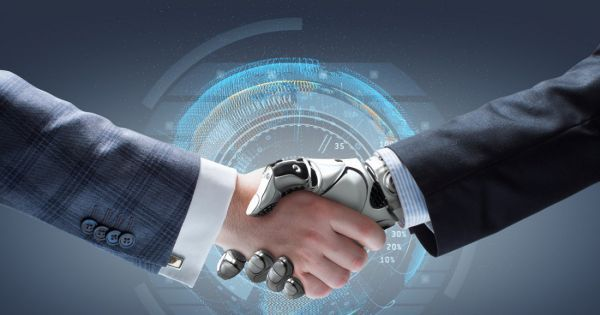

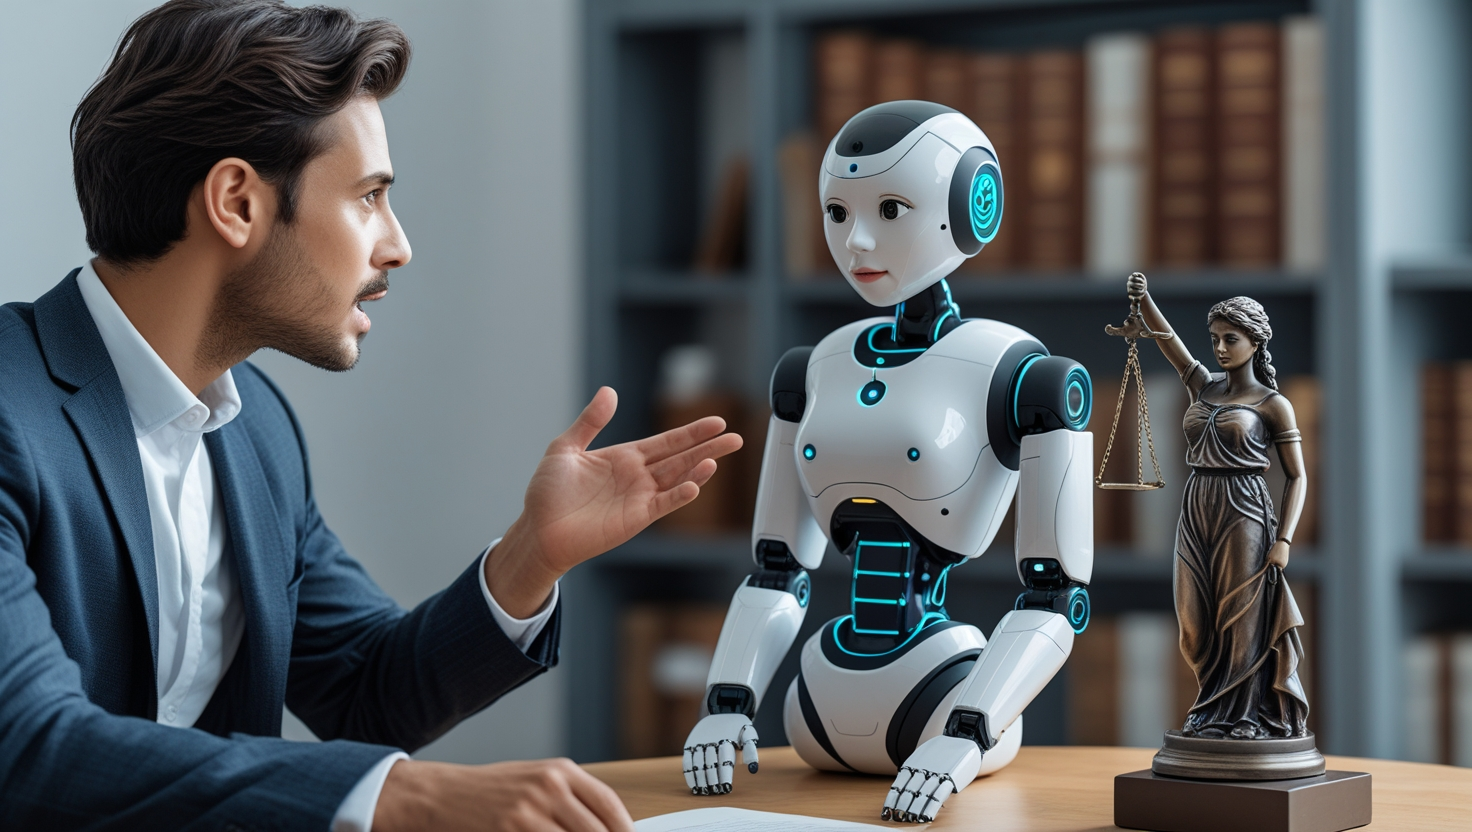

## Notebook Setup and Data Access
This notebook is configured to run in a Python 3 environment preloaded with a variety of useful analytics and machine learning libraries. The environment is defined by the official Kaggle Docker image, which you can explore here: kaggle/docker-python.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-legal-notice/real_legal notice.jpg
/kaggle/input/sample-legal-notice/sample_legal_notice.pdf


## Install & Import Dependencies

In [2]:
# Install and Import Dependencies
!pip uninstall -qy jupyterlab jupyterlab-lsp
!pip install -qU 'google-genai==1.7.0' google-search-results 

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 3.9 MB/s eta 0:00:00


In [3]:
# Install core libraries for GenAI, document parsing, image extraction, web scraping, pdf parsing and rendering & web search
!pip install -q google-genai==1.7.0 langchain pdfplumber beautifulsoup4 duckduckgo-search pymupdf easyocr opencv-python matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.1 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 65.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.1 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.


## 🔐 Accessing Google API Key from Kaggle Secrets

The following code retrieves a stored Google API Key using the `UserSecretsClient` provided by Kaggle
Make sure you’ve added the GOOGLE_API_KEY to your Kaggle Secrets before running this code

In [4]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

##  Setup: Imports & Gemini AI Configuration
This section sets up all necessary dependencies and configures the Gemini AI model to support legal document understanding and intelligent response generation.

####  Libraries Used:

- `fitz` & `pdfplumber`: For parsing and reading text from PDFs.
- `BeautifulSoup`, `requests`: For web scraping and HTML parsing.
- `duckduckgo_search`: To perform privacy-focused legal web searches.
- `google.generativeai`: Gemini API for generating smart responses.
- `easy ocr`: Extract text from images for image understanding
- `IPython.display`: To render clean Markdown outputs in notebooks.


####  API Configuration:

genai.configure(api_key=GOOGLE_API_KEY)

Sets up the Gemini model **(gemini-1.5-pro-latest)** using your Google API Key to enable advanced AI interactions.


In [5]:
import os
import fitz  
import pdfplumber
from bs4 import BeautifulSoup
import requests
import re
import sys
import json
import cv2
import easyocr
import numpy as np
import random 
import matplotlib.pyplot as plt
from duckduckgo_search import DDGS
import google.generativeai as genai
from datetime import datetime
from IPython.display import Markdown, display
from google.api_core import retry

model = genai.GenerativeModel("gemini-1.5-pro-latest")
genai.configure(api_key=GOOGLE_API_KEY)

###  Legal Document Understanding (PDF Parsing)

This function reads a PDF file and extracts the text content from each page using the `pdfplumber` library. It then returns the first 4000 characters of the combined text, which is within the safe token limit for Gemini models.

In [6]:
#Legal Document Understanding (PDF Parsing)
def extract_text_from_pdf(pdf_path):
    full_text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            full_text += page.extract_text()
    return full_text[:4000]  # Gemini safe limit

##  Legal Source Finder with Trusted Domains

This function helps retrieve reliable legal references for a given user query by searching only within trusted Indian legal and government websites.

```python
def get_legal_sources(query, max_results=3):
    ...
```

 **Key Features**:
- **Trusted Domains**: Searches only from vetted legal sources like:
  - `indiankanoon.org`
  - `gov.in`
  - `prsindia.org`
  - `egazette.nic.in`
  - `legislative.gov.in`
  
- **DuckDuckGo Search**: Uses the `duckduckgo_search` library to perform a private, API-based web search.
- **Smart Filtering**: Only includes links that actually match the trusted domains in the final output.


In [7]:
#  Legal Source Finder with Trusted Domains
def get_legal_sources(query, max_results=3):
    # Trusted domains for Indian legal and government content
    trusted_sites = [
        "site:indiankanoon.org", 
        "site:gov.in", 
        "site:prsindia.org", 
        "site:egazette.nic.in", 
        "site:legislative.gov.in"
    ]

    # Combine all trusted domains into a single search query
    combined_sites = " OR ".join(trusted_sites)
    search_query = f"{query} {combined_sites}"

    with DDGS() as ddgs:
        results = ddgs.text(search_query, max_results=max_results)

    trusted_links = []
    for result in results:
        href = result.get("href")
        # Ensure link is from a trusted site
        if href and any(site.split(":")[1] in href for site in trusted_sites):
            trusted_links.append(href)

    return trusted_links


## Search Relevant News Articles

This function fetches the latest news articles related to a given legal query using keyword-based web search.

```python
def get_news_links(query, num_results=3):
    ...
```

 **How It Works**:
- Appends `"site:news"` to your query to bias results toward news sources.
- Uses the `search()` method (from `duckduckgo_search` or `googlesearch-python`) to retrieve top headlines.
Useful for:
- Surfacing public opinions or recent developments on a legal topic.
- Enhancing user trust with real-world context.


In [8]:
# Search Relevant News Articles

def get_news_links(query, num_results=3):
    return list(search(query + " site:news", num=num_results, stop=num_results, pause=2))

## Simplified Legal Summary using Gemini + Grounded Sources

This function uses **Gemini 1.5 Pro** to generate clear, citizen-friendly legal guidance by combining:

-  User’s legal question
-  Extracted content from uploaded legal documents
-  Trusted Indian legal sources

```python
def summarize_legal_issue(document_text, query, urls):
    ...
```

### Ideal for:
- Legal document analysis
- Rights clarification
- Building citizen trust with source-grounded outputs

In [9]:
#Simplified Summary using Gemini + Grounding
def summarize_legal_issue(document_text, query, urls):
    prompt = f"""
You are a legal AI assistant helping citizens understand their rights.

User Question: {query}

Document Content:
{document_text}

Trusted Source URLs:
{', '.join(urls)}

Generate:
- Clear answer with law references
- Steps the citizen can take
- End with source links
"""

    response = model.generate_content(prompt)
    return response.text


## Function Calling — Generate Legal Notice or Action Plan

This function uses **Gemini 1.5 Pro** to auto-generate a **formal legal notice** or **action plan** based on user inputs.

```python
def generate_legal_notice(user_issue, user_name, opponent_name):
    ...
```

### How it works:
- Takes in:
  -  User's legal **issue**
  -  **User name**
  -  **Opponent name**
- Sends a structured prompt to Gemini to generate:
  - A **well-formatted, actionable** legal notice

In [10]:
#Function Calling — Generate Legal Notice or Action Plan
def generate_legal_notice(user_issue, user_name, opponent_name):
    prompt = f"""
Draft a legal notice based on the following:

- Problem: {user_issue}
- User: {user_name}
- Opponent: {opponent_name}

Make it formal and actionable.
"""
    response = model.generate_content(prompt)
    return response.text


## Web Scraper — Extract Legal or News Content from URLs

This utility function extracts readable text from any given **news or legal web page**.

```python
def scrape_web_text(url):
    ...
```

### What it does:
- Fetches the webpage using `requests`
- Parses the content using `BeautifulSoup`
- Extracts all `<p>` tag text and joins it
- Trims the result to 4000 characters to stay within model input limits

In [11]:
# Scrape Any Web Text (news or legal)
def scrape_web_text(url):
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        text = " ".join([para.get_text() for para in paragraphs])
        return text[:4000]  # Trim to avoid long context
    except Exception:
        return ""


## Direct Legal Query Answering (with Trusted Sources)

This function lets users ask **any Indian legal question**, and gets a direct, grounded answer from verified sources.

```python
def answer_legal_query_directly(query):
    ...
```

### How it works:
1. **Searches**: Queries trusted domains like `indiankanoon.org`, `gov.in`, etc.
2. **Scrapes**: Extracts readable text from top search results.
3. **Generates**: Uses Gemini to form a legal answer with:
   - Clear explanation
   - Law references (acts, sections)
   - Source link for user transparency

In [12]:
def answer_legal_query_directly(query):
    print(f" Searching trusted legal sources for: {query}")
    urls = get_legal_sources(query)
    results = []

    for url in urls:
        text = scrape_web_text(url)
        if len(text) > 300:
            prompt = f"""
You are a legal AI assistant. A user has asked a legal question:

**Question:** {query}

Below is relevant legal content from a trusted source:

{text}

Your task:
- Answer the user's query clearly
- Mention relevant legal sections/acts if found
- End with a trusted source link: {url}
"""
            try:
                response = model.generate_content(
                    contents=[prompt],
                    generation_config=genai.types.GenerationConfig(
                        temperature=0.3,
                        max_output_tokens=2048
                    )
                )
                return response.text + f"\n\n [Source Link]({url})"
            except Exception as e:
                print(f" Gemini API Error: {e}")
    
    return "Sorry, I couldn't find a reliable legal source to answer your question."


## Features and it's output
Simplified Summary for Legal Notices + Ask Questions from the Legal Document + Function Calling — Generate Legal Notice or Action Plan

In [13]:
#Query use case
#  Upload legal PDF or use sample
pdf_path = "/kaggle/input/sample-legal-notice/sample_legal_notice.pdf"  
document_text = extract_text_from_pdf(pdf_path)

# User asks a question
query = "Can my landlord evict me without notice?"

# Get links
sources = get_legal_sources(query)

# Generate Answer
summary = summarize_legal_issue(document_text, query, sources)
display(Markdown(summary))

# Generate Legal Notice
notice = generate_legal_notice(query, "Ravi Kumar", "Landlord")
display(Markdown("###  Drafted Legal Notice"))
display(Markdown(notice))


No, your landlord cannot evict you without notice in Tamil Nadu.  According to the Tamil Nadu Regulation of Rights and Responsibilities of Landlords and Tenants Act, 2017, a landlord must provide a written notice and allow at least one month before evicting a tenant. This applies even if there is no formal written lease agreement. Attempting to evict a tenant without following this procedure is illegal.

Here are the steps you can take:

1. **Document Everything:** Keep records of all communication, including any attempts by your landlord to evict you, any notices (even if improper), and witnesses to any events.  Photos and videos can be helpful as well.
2. **Send a Formal Notice:**  As you have already done in the provided notice, clearly state to your landlord in writing that their actions are illegal and cite the Tamil Nadu Regulation of Rights and Responsibilities of Landlords and Tenants Act, 2017. Demand that they cease any illegal eviction attempts.
3. **Contact the Police:** If your landlord continues to harass you or attempts to forcibly evict you, you should contact the local police and file a complaint.
4. **Seek Legal Counsel:** Consult with a lawyer specializing in tenant rights. They can advise you on the best course of action and represent you in court if necessary.  They can also help you understand the specifics of the 2017 Act.
5. **Mediation (Optional):**  Before escalating to legal action, you could attempt mediation with your landlord through a mutually agreed upon third party.

It's important to know and assert your rights as a tenant.  Illegal eviction is a serious matter.


While I can't provide specific legal advice, here are some potentially helpful resources:

* **Tamil Nadu Regulation of Rights and Responsibilities of Landlords and Tenants Act, 2017:**  (Unfortunately, a direct link to the official text of this Act is not readily available online. It's best to consult a legal professional or government office for access.)
* **General Information (Not Specific to Tamil Nadu Law):**
    * Mumbai Police Tenant Information (for general context): https://mumbaipolice.gov.in/TenantForm?ps_id=0
    * E-Summons Portal (for understanding legal processes): https://www.india.gov.in/e-summons-portal-delivery-summons-warrants
    * Digital Police (general platform): https://digitalpolice.gov.in/


*Please note that these links provide general legal information and might not be specific to the intricacies of tenancy laws in Tamil Nadu.  It is crucial to consult with a legal professional in your area for accurate and personalized guidance.*


###  Drafted Legal Notice

LEGAL NOTICE

**DATE:** [Date]

**TO:** [Landlord's Full Name]
[Landlord's Full Address]

**FROM:** Ravi Kumar
[Ravi Kumar's Full Address]
[Ravi Kumar's Phone Number]
[Ravi Kumar's Email Address]


**SUBJECT:  Illegal Eviction and Demand for Cessation and Desist**

This legal notice is to inform you, [Landlord's Full Name], that your recent actions regarding my tenancy at [Full Address of Rental Property] constitute an illegal eviction and a violation of my tenant rights.  I am currently a tenant at the aforementioned property under [State the nature of the tenancy agreement - e.g., a month-to-month tenancy, a lease agreement, etc.], commencing on [Start Date of Tenancy].

You have [Clearly and concisely describe the landlord's actions that constitute the attempted eviction. Be specific.  Examples: changing the locks, shutting off utilities, removing personal belongings, verbally demanding that you leave without proper notice, etc.].  These actions were taken on [Date(s) of Landlord's Actions] and were undertaken without proper legal notice as required by [Cite relevant state/local law or statute regarding eviction procedures and notice requirements].

Your actions have caused me [Explain the harm you have suffered as a result of the landlord's actions.  Examples: financial losses, emotional distress, inconvenience, etc.].

Therefore, I demand that you immediately cease and desist from all further actions aimed at evicting me from the premises without adhering to the proper legal procedures as outlined in [Cite relevant state/local law or statute again].  This includes, but is not limited to, [List specific actions the landlord must stop, e.g., harassing me, entering the property without permission, interfering with utilities, etc.].

Furthermore, I demand that you [State any other demands, such as restoration of services, compensation for damages, etc.].  I expect a written response to this notice within [Number] days, specifically by [Date].  Failure to comply with this notice and the applicable law may result in further legal action, including but not limited to, filing a lawsuit for wrongful eviction and seeking monetary damages.

This notice serves as a formal demand for your compliance with the law and my tenant rights.

Sincerely,


Ravi Kumar


**[Signature of Ravi Kumar]**


**Note:** This is a sample legal notice and may not be suitable for all situations.  You should consult with an attorney to ensure that this notice is appropriate for your specific circumstances and jurisdiction.  Laws governing landlord-tenant relationships vary significantly by location, so it's crucial to get legal advice tailored to your situation.  This sample notice does not constitute legal advice and should not be used as a substitute for the advice of a qualified attorney.


## Asking any legal questions without uploading any document

In [14]:
#  Ask Any Legal Question (without document)
query = "How can I file a complaint against an online seller?"
legal_response = answer_legal_query_directly(query)
display(Markdown(legal_response))


 Searching trusted legal sources for: How can I file a complaint against an online seller?


You can file a complaint against an online seller through several avenues provided by the Indian government:

1. **National Consumer Helpline (NCH):**  You can create an account on the NCH portal to lodge your grievance. This allows you to formally record your complaint, track its status, upload supporting documents (receipts, warranties, communication records), and receive updates on the actions taken by the authorities.

2. **Food Safety Connect:** If your complaint concerns food safety issues (adulterated food, unsafe food, substandard food, labeling defects, misleading advertisements), you can register it through Food Safety Connect. You will receive a unique reference number to track your concern.

3. **Integrated Grievance Redress Mechanism (INGRAM):** This portal serves as a single platform for various stakeholders (consumers, government agencies, private companies, regulators) to address consumer grievances. You can register any type of consumer issue here.

While the provided text doesn't mention specific legal sections/acts, these platforms operate under the broader framework of consumer protection laws in India.

[https://services.india.gov.in/service/detail/register-a-consumer-complaint-with-national-consumer-helpline-nch](https://services.india.gov.in/service/detail/register-a-consumer-complaint-with-national-consumer-helpline-nch)


 [Source Link](https://services.india.gov.in/service/detail/register-a-consumer-complaint-with-national-consumer-helpline-nch)

##  Tax Law Assistant — India

Easily get personalized tax advice using the latest income tax rules in India.

This tool:
- Understands income source & amount
- Determines applicable regime (old/new)
- Calculates tax payable step-by-step
- Shares deductions and tips to save
- Adds official references for transparency

In [15]:
def get_tax_advice(user_query):
    system_prompt = (
        "You are a certified Indian tax consultant AI assistant. "
        "Answer the user's question in a clear, structured way using the latest tax laws and budget updates. "
        "Include the following sections:\n\n"
        "1. **User Query**\n"
        "2. **Applicable Tax Regime & Slab**\n"
        "3. **Total Tax Payable (with calculation)**\n"
        "4. **Possible Deductions / Tax Saving Tips**\n"
        "5. **Summary Advice**\n"
        "6. **Trusted Sources** (include official links like incometax.gov.in, cbic.gov.in, or cleartax.in)\n"
        "Use Markdown formatting for headings and bold text."
    )

    full_prompt = f"{system_prompt}\n\nUser: {user_query}"
    response = model.generate_content(full_prompt)
    return response.text

query = get_tax_advice("I am a freelancer earning 15 lakhs per year. What tax will I pay?")
display(Markdown(query))

## **User Query**

I am a freelancer earning 15 lakhs per year. What tax will I pay?

## **Applicable Tax Regime & Slab**

As a freelancer, you are considered self-employed and your income is categorized under "Income from Business or Profession." You have the option to choose between the old tax regime and the new tax regime introduced in Budget 2020.  We will calculate for both:

**Old Regime:**

For the financial year 2023-24, the applicable slab rates under the old regime for income up to ₹15 Lakhs are:

* Up to ₹2.5 Lakhs: Nil
* ₹2.5 Lakhs to ₹5 Lakhs: 5%
* ₹5 Lakhs to ₹10 Lakhs: 20%
* ₹10 Lakhs to ₹15 Lakhs: 30%

**New Regime:**

For the financial year 2023-24, the applicable slab rates under the new regime are:

* Up to ₹3 Lakhs: Nil
* ₹3 Lakhs to ₹6 Lakhs: 5%
* ₹6 Lakhs to ₹9 Lakhs: 10%
* ₹9 Lakhs to ₹12 Lakhs: 15%
* ₹12 Lakhs to ₹15 Lakhs: 20%


## **Total Tax Payable (with calculation)**

**Old Regime Calculation:**

* 0 - ₹2.5 Lakhs: ₹0
* ₹2.5 Lakhs - ₹5 Lakhs: ₹12,500 (5% of ₹2.5 Lakhs)
* ₹5 Lakhs - ₹10 Lakhs: ₹1,00,000 (20% of ₹5 Lakhs)
* ₹10 Lakhs - ₹15 Lakhs: ₹1,50,000 (30% of ₹5 Lakhs)
* **Total Tax:** ₹2,62,500
* **Cess:** 4% of ₹2,62,500 = ₹10,500
* **Total Tax Payable:** ₹2,73,000

**New Regime Calculation:**

* 0 - ₹3 Lakhs: ₹0
* ₹3 Lakhs - ₹6 Lakhs: ₹15,000 (5% of ₹3 Lakhs)
* ₹6 Lakhs - ₹9 Lakhs: ₹30,000 (10% of ₹3 Lakhs)
* ₹9 Lakhs - ₹12 Lakhs: ₹45,000 (15% of ₹3 Lakhs)
* ₹12 Lakhs - ₹15 Lakhs: ₹60,000 (20% of ₹3 Lakhs)
* **Total Tax:** ₹1,50,000
* **Cess:** 4% of ₹1,50,000 = ₹6,000
* **Total Tax Payable:** ₹1,56,000


## **Possible Deductions / Tax Saving Tips**

You can reduce your tax liability under the old regime by utilizing various deductions under Chapter VI-A of the Income Tax Act. Some common deductions include:

* **Section 80C:** Investments in PPF, EPF, ELSS, Life insurance premiums, etc. (up to ₹1.5 Lakhs).
* **Section 80D:** Health insurance premiums for self, family, and parents.
* **Section 80TTA/TTB:** Interest earned on savings bank accounts.
* **Section 80G:** Donations to charitable organizations.
* **Deduction for Home Loan Interest (Section 24):**  If you have a home loan.

Under the new regime, most of these deductions are not available.


## **Summary Advice**

Based on your income of ₹15 Lakhs, the **new tax regime appears more beneficial** in terms of lower tax payable.  However, you should carefully evaluate your eligible deductions under the old regime. If the value of your deductions significantly lowers your taxable income, the old regime might be preferable. It is advisable to consult with a chartered accountant for personalized tax planning based on your specific financial situation.


## **Trusted Sources**

* [Income Tax Department](https://www.incometax.gov.in/)
* [Central Board of Direct Taxes (CBDT)](https://www.cbic.gov.in/)
* [ClearTax](https://cleartax.in/) (for general information and tax calculators)


**Disclaimer:** This information is for general guidance only and does not constitute professional tax advice.  You should consult with a qualified tax professional for personalized advice based on your specific circumstances.


## Fake legal notice detector
This tool helps users upload scanned or photographed legal notices (images or PDFs) and uses OCR + heuristics + LLM to detect whether the notice is potentially fake or legitimate.

### How It Works
- `OCR with EasyOCR:` Extracts text from an uploaded image or scanned PDF.

- `Pattern & Keyword Detection:` Checks for suspicious language patterns often found in fake notices (e.g., "non-bailable warrant", "arrest within 24 hours", "pay immediately to avoid jail").

- `Fake Score Logic:` Based on detected red flags, assigns a confidence score and verdict.



In [16]:
# Load OCR reader
reader = easyocr.Reader(['en'])

# Preprocess the image to improve OCR accuracy
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    cv2.imwrite("processed_notice.jpg", thresh)
    return "processed_notice.jpg"

# Extract text using EasyOCR
def extract_text_easyocr(image_path):
    results = reader.readtext(image_path, detail=0)
    return "\n".join(results)

# Detect suspicious keywords
def detect_fake_notice(text):
    suspicious_keywords = ["urgent action", "pay immediately", "legal threat", "court summon", "non-bailable"]
    found = [kw for kw in suspicious_keywords if kw.lower() in text.lower()]
    if found:
        return f" Suspicious terms found: {', '.join(found)}\n\nThis may be a **fake notice**. Please consult a lawyer."
    else:
        return " No suspicious content detected. The notice appears legitimate."


#image path
image_path = "/kaggle/input/real-legal-notice/real_legal notice.jpg"  

#Preprocess image and extract text
processed_path = preprocess_image(image_path)
text = extract_text_easyocr(processed_path)

#Display results
display(Markdown("###  Extracted Text"))
display(Markdown(f"```\n{text}\n```"))

display(Markdown("###  Fake Notice Detector"))
display(Markdown(detect_fake_notice(text)))

###  Extracted Text

```
Shardu
Amurchand Manaldas
RedeCon#4Cottd
crlomCats
Ea
medeces
JCas
32#5er 3ro
bDm (~potdd
Wecboaam
405trdtk
A=
Mlr
Mmpeedabe
0.0r14mot
Met
LndMeeeC
Copt @:
```

###  Fake Notice Detector

 No suspicious content detected. The notice appears legitimate.

## Real-Time Legal Consultation 

This section defines utility functions to **search and extract lawyer details** from [LawRato.com](https://lawrato.com) based on city and legal specialization. This data is helpful for validating or suggesting legal assistance in fake legal notice scenarios.

### Features Implemented:

- **Lawyer Search by City and Specialization** using LawRato’s URL structure.
- **HTML Parsing with BeautifulSoup** to extract:
  - Name
  - Experience
  - Location
  - Rating
  - Practice Areas
  - Languages Spoken
- **Heuristic-based Availability Estimation**
- **Formatted Outputs** using pandas DataFrame.
- **Fallback Handling** when fields are missing or ambiguous.


In [17]:
SPECIALIZATIONS = {
    "1": "Criminal",
    "2": "Family",
    "3": "Property",
    "4": "Corporate",
    "5": "Civil"
}

# Common practice areas for searching and matching
COMMON_PRACTICES = [
    "criminal", "civil", "family", "divorce", "property", "corporate", 
    "tax", "intellectual property", "labor", "immigration", "bankruptcy"
]

# Default request headers for web scraping
DEFAULT_HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.google.com/"
}



def is_available_now():
    """Simulate lawyer availability using time of day heuristics"""
    current_hour = datetime.now().hour
    # Most lawyers available during business hours (10AM-6PM)
    if 10 <= current_hour <= 18:
        return random.choice([True, True, False])  # 66% chance of availability during business hours
    else:
        return random.choice([False, False, True])  # 33% chance of availability outside business hours

def format_languages(languages):
    """Format languages with proper capitalization and commas"""
    if languages == "Not specified" or not languages:
        return languages
        
    # Convert languages to proper format with capitalization and commas
    languages = languages.replace("\n", ", ")
    # Split by common separators and clean up
    lang_list = re.split(r'[,;、]\s*', languages)
    # Remove empty items and capitalize each language
    lang_list = [lang.strip().capitalize() for lang in lang_list if lang.strip()]
    # Join back with commas
    return ", ".join(lang_list)

def format_practice_areas(practice_areas):
    """Format practice areas with proper capitalization"""
    if practice_areas == "Not specified" or not practice_areas:
        return practice_areas
        
    if len(practice_areas) > 100:  # If it's a long list
        return f" {practice_areas.title()}"
    else:
        return practice_areas.title()



def get_lawyers_from_lawrato(city, specialization):
    """
    Get lawyer data from lawrato.com using their site structure
    """
    # Format the URL properly
    city_formatted = city.lower().strip()
    specialization_formatted = specialization.lower().strip()
    url = f"https://lawrato.com/{specialization_formatted}-lawyers/{city_formatted}"

    #print(f"Fetching lawyers from: {url}")
    
    try:
        # Request the page
        response = requests.get(url, headers=DEFAULT_HEADERS, timeout=10)        # print(f"Status code: {response.status_code}") # Commented for cleaner output
        
        if response.status_code != 200:
            print(f"Failed to fetch data: HTTP {response.status_code}")
            print("No lawyers found for the search. Please visit lawrato.com directly.")
            return pd.DataFrame()
        # Parse the HTML
        soup = BeautifulSoup(response.content, 'html.parser')
        # Look for key HTML structures on lawrato.com
        # print("Analyzing page structure...") # Commented for cleaner output        # Process HTML containers
        lawyers_data = extract_lawyers_from_html(soup, city, specialization)
        if lawyers_data:
            # print(f"Successfully extracted data for {len(lawyers_data)} lawyers") # Commented for cleaner output
            return pd.DataFrame(lawyers_data)
        else:
            print("No lawyer data could be extracted. Please visit lawrato.com directly.")
            return pd.DataFrame()
            
    except Exception as e:
        print(f"Error: {e}")
        print("No lawyers found for the search. Please visit lawrato.com directly.")
        return pd.DataFrame()


def extract_lawyers_from_html(soup, city, specialization):
    """Extract lawyer data directly from HTML elements"""
    lawyers_data = []
    
    # LawRato specific selectors - looking for lawyer-item elements
    lawyer_containers = soup.select('.lawyer-item')
    
    if lawyer_containers:
        print(f"Found {len(lawyer_containers)} lawyer listings using primary selector")
    else:
        # Try alternative selectors
        lawyer_containers = soup.select('.lawyer-item, .border-box')
        if lawyer_containers:
            print(f"Found {len(lawyer_containers)} lawyer listings using alternative selector")
        
    if lawyer_containers:
        #print(f"Processing {len(lawyer_containers)} potential lawyer entries from HTML")
        for container in lawyer_containers[:5]:  # Limit to first 5 for performance
            try:
                # Look for name in specific elements
                name_elem = container.select_one('.media-heading')
                if name_elem:
                    name = name_elem.get_text().strip()
                else:
                    # Try alternative selectors for name
                    name_elem = container.select_one('h2') or container.select_one('a[title]')
                    name = name_elem.get_text().strip() if name_elem else None
                    if not name and name_elem and name_elem.has_attr('title'):
                        name = name_elem['title']
                
                if not name or len(name) < 3:
                    continue
                
                # Look for location
                location_elem = container.select_one('.location span')
                location = location_elem.get_text().strip() if location_elem else city.title()
                
                # Look for experience
                experience_elem = container.select_one('.experience span')
                experience = experience_elem.get_text().strip() if experience_elem else "Not specified"
                
                # Look for rating
                rating_elem = container.select_one('.score')
                rating = "Not rated"
                if rating_elem:
                    rating_text = rating_elem.get_text().strip()
                    rating_match = re.search(r'(\d\.?\d*)', rating_text)
                    if rating_match:
                        rating = f"{rating_match.group(1)}/5"
                
                # Get profile URL
                profile_url = ""
                link_elem = container.select_one('a[href]')
                if link_elem:
                    href = link_elem.get('href')
                    if href and href.startswith('http'):
                        profile_url = href
                    elif href:
                        profile_url = f"https://lawrato.com{href}"
                
                # Add to our data
                lawyers_data.append({
                    "Name": name,
                    "Specialization": specialization.title() + " Law",
                    "Location": location,
                    "Experience": experience,
                    "Rating": rating,
                    "Available_Now": is_available_now(),
                    "Source": "lawrato.com (HTML)",
                    "Profile_URL": profile_url
                })
            except Exception as e:
                print(f"Error processing lawyer container: {e}")
                
    return lawyers_data
    

def get_lawyer_details(url):
    """Get detailed information for a lawyer from their profile page"""
    details = {
        "Experience": "Not specified",
        "Languages": "Not specified",
        "Practice_Areas": "Not specified",
        "Rating": "Not rated"
    }
    
    #print(f"Fetching details from: {url}")
    
    try:
        # Request the page
        response = requests.get(url, headers=DEFAULT_HEADERS, timeout=15)
        
        if response.status_code != 200:
            print(f"Failed to fetch profile: HTTP {response.status_code}")
            return details
            
        # Parse the HTML
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract different types of information
        details["Experience"] = extract_experience_info(soup)
        details["Languages"] = extract_language_info(soup)
        details["Practice_Areas"] = extract_practice_areas(soup, url)
        details["Rating"] = extract_rating_info(soup)
        
        return details
        
    except Exception as e:
        print(f"Error fetching lawyer details: {e}")
        return details

def extract_experience_info(soup):
    """Extract experience information from lawyer profile"""
    # Look for experience information - common patterns on lawyer profiles
    exp_elements = soup.select('.experience, .exp, .lawyer-exp, .profile-exp, .years-exp')
    if exp_elements:
        exp_text = exp_elements[0].get_text().strip()
        exp_pattern = r"(\d+)\+?\s*(?:Years|Yrs|Year)"
        exp_match = re.search(exp_pattern, exp_text, re.IGNORECASE)
        if exp_match:
            return f"{exp_match.group(1)} years Experience"
    
    # Try a broader search for experience
    exp_pattern = r"(?:Experience|Exp)[:\s]*(\d+)\+?\s*(?:Years|Yrs|Year)"
    for elem in soup.find_all(['p', 'div', 'span', 'li']):
        text = elem.get_text()
        exp_match = re.search(exp_pattern, text, re.IGNORECASE)
        if exp_match:
            return f"{exp_match.group(1)} years Experience"
    
    return "Not specified"

def extract_language_info(soup):
    """Extract language information from lawyer profile"""
    # Look for languages
    language_elements = soup.select('.languages, .langs, .language-list, .lawyer-langs')
    if language_elements:
        return language_elements[0].get_text().strip().replace("Languages:", "").strip()
    
    # Try to find languages mentioned elsewhere
    for elem in soup.find_all(['p', 'div', 'span', 'li']):
        text = elem.get_text().lower()
        if "language" in text and len(text) < 150:  # Reasonable length for language list
            # Extract languages
            text = re.sub(r'language[s]?[:\s]*', '', text, flags=re.IGNORECASE).strip()
            if 3 < len(text) < 150:  # Sanity check
                return text
    
    return "Not specified"

def extract_practice_areas(soup, url):
    """Extract practice areas from lawyer profile"""
    practice_areas = []
    
    # Method 1: Check for structured practice areas display
    practice_elements = soup.select('.practice-areas, .areas-of-practice, .specialization, .lawyer-practice')
    if practice_elements:
        practice_text = practice_elements[0].get_text().strip()
        practice_areas_text = practice_text.replace("Practice Areas:", "").strip()
        if practice_areas_text:
            practice_areas.append(practice_areas_text)
    
    # Method 2: Check for skill tags which often contain practice areas
    skill_tags = soup.select('.skill-tag, .tag, .lawyer-skill-tag, .practice-tag')
    if skill_tags:
        for tag in skill_tags:
            tag_text = tag.get_text().strip()
            if tag_text and len(tag_text) < 50:  # Reasonable length for a practice area
                practice_areas.append(tag_text)
    
    # Method 3: Look for areas in HTML classes specifically on LawRato
    area_sections = soup.select('.area-skill, .skill-section, .expertise-section, .specialization-section')
    for section in area_sections:
        section_text = section.get_text().strip()
        if "practice area" in section_text.lower() or "specialization" in section_text.lower():
            # Extract the content after the heading
            content = re.sub(r'^.*?(?:practice areas|specializations?)[:\s]*', '', 
                             section_text, flags=re.IGNORECASE|re.DOTALL).strip()
            if content:
                practice_areas.append(content)
    
    # Method 4: Check for keyword lists that might contain practice areas
    keyword_lists = soup.select('.lawyer-keywords, .keywords, .tags-list, .practice-list')
    for keyword_list in keyword_lists:
        keywords = [kw.get_text().strip() for kw in keyword_list.find_all(['a', 'span', 'li'])]
        if keywords:
            practice_areas.extend(keywords)
    
    # Method 5: Look for practice areas in individual skill elements
    skill_elements = soup.select('.skill, .expertise, .practice-area')
    for skill in skill_elements:
        skill_text = skill.get_text().strip()
        if skill_text and len(skill_text) < 50:
            practice_areas.append(skill_text)
    
    # Method 6: Scan the page for common practice area indicators
    if not practice_areas:
        for elem in soup.find_all(['li', 'p', 'div', 'span']):
            text = elem.get_text().strip()
            # Check if this is likely a list of practice areas
            if any(practice in text.lower() for practice in COMMON_PRACTICES):
                # If it contains multiple common practice areas, it's likely a list
                matches = sum(1 for practice in COMMON_PRACTICES if practice in text.lower())
                if matches >= 2 and len(text) < 300:
                    practice_areas.append(text)
                    break
    
    # Clean up and deduplicate practice areas
    if practice_areas:
        # Flatten multi-line practice areas and split by common separators
        all_areas = []
        for area_text in practice_areas:
            # Replace newlines with commas
            cleaned = area_text.replace("\n", ", ")
            # Split by common separators and clean up each item
            split_areas = re.split(r'[,;•|&+]', cleaned)
            all_areas.extend([area.strip() for area in split_areas if area.strip()])
        
        # Remove duplicates and sort
        unique_areas = sorted(set(all_areas))
        return ", ".join(unique_areas).lower()
    
    # Check if we can extract from the URL or original lawyer data
    if any(kw in url.lower() for kw in COMMON_PRACTICES):
        for kw in COMMON_PRACTICES:
            if kw in url.lower():
                return kw
    
    return "Not specified"

def extract_rating_info(soup):
    """Extract rating information from lawyer profile"""
    rating_elements = soup.select('.rating, .score, .star-rating')
    if rating_elements:
        rating_text = rating_elements[0].get_text().strip()
        rating_match = re.search(r'(\d\.?\d*)[/\s]?\d*\s*\((\d+\+?\s*(?:user ratings|ratings))', rating_text, re.IGNORECASE)
        if rating_match:
            return f"{rating_match.group(1)}/5 ({rating_match.group(2)})"
        else:
            rating_match = re.search(r'(\d\.?\d*)', rating_text)
            if rating_match:
                return f"{rating_match.group(1)}/5"
    
    return "Not rated"



def enrich_lawyer_data(df, fetch_details=True):
    """Enrich the lawyer DataFrame with additional details from their profiles"""
    if df.empty:
        return df
        
    # Make a copy to avoid modifying the original
    enriched_df = df.copy()
    
    if fetch_details and "URL" in enriched_df.columns:
        #print(f"\nFetching detailed information for {len(enriched_df)} lawyers...")
        for index, row in enriched_df.iterrows():
            if pd.notna(row["URL"]) and row["URL"]:
                try:
                    details = get_lawyer_details(row["URL"])
                    for key, value in details.items():
                        if key in enriched_df.columns:
                            enriched_df.at[index, key] = value
                    print(f"✓ Fetched details for {row['Name']}")
                except Exception as e:
                    print(f"✗ Failed to fetch details for {row['Name']}: {e}")
    
    return enriched_df

def get_detailed_lawyer_info(df, limit=5):
    """Get detailed information for each lawyer by visiting their profile pages"""
    if df.empty:
        return []
        
    lawyer_details = []
    count = 1
    
    #print(f"\nFound {len(df)} lawyers. Fetching detailed information...")
    for index, row in df.iterrows():
        if count > limit:  # Limiting to top N lawyers for better performance
            break
            
        lawyer_name = row['Name'] if 'Name' in row else "Unknown"
        lawyer_url = row.get('Profile_URL', "")
        
        if not lawyer_url:
            continue
            
        #print(f"Processing {count}/{min(limit, len(df))}: {lawyer_name}")
        
        try:
            # Get basic info from the listing
            lawyer_info = {
                "Name": lawyer_name,
                "Location": row.get('Location', "Unknown"),
                "Experience": row.get('Experience', "Not specified"),
                "URL": lawyer_url
            }
            
            # Get additional details from profile page
            details = get_lawyer_details(lawyer_url)
            
            # Update with details from profile
            if details.get("Experience") != "Not specified":
                lawyer_info["Experience"] = details["Experience"]
            lawyer_info["Languages"] = details.get("Languages", "Not specified")
            lawyer_info["Practice_Areas"] = details.get("Practice_Areas", row.get('Specialization', "Not specified"))
            lawyer_info["Rating"] = details.get("Rating", row.get('Rating', "Not rated"))
            
            lawyer_details.append(lawyer_info)
            count += 1
        except Exception as e:
            print(f"Error processing lawyer {lawyer_name}: {e}")
    
    return lawyer_details


def display_lawyers_results(lawyer_details, specialization, location):
    """Display results in a nicely formatted output with emojis"""
    print(f"\n#  Top {specialization} Lawyers in {location}")
    
    for i, lawyer in enumerate(lawyer_details, 1):
        print(f"\n## {i}.  {lawyer['Name']}")
        print(f"- ** Location:** {lawyer['Location']}")
        print(f"- ** Experience:** {lawyer['Experience']}")
        
        # Format languages with proper capitalization and commas
        languages = format_languages(lawyer['Languages'])
        print(f"- ** Languages:** {languages}")
        
        # Format practice areas with proper capitalization
        practice_areas = format_practice_areas(lawyer['Practice_Areas'])
        print(f"- ** Practice Areas:** {practice_areas}")
        
        print(f"- ** Rating:** {lawyer['Rating']}")
        print(f"- ** For more information:** {lawyer['URL']}")
    
    # Add a helpful closing message
    print("\n---")
    print(f" **Need legal assistance?** Contact one of these top-rated {specialization.lower()} lawyers in {location} today!")


def interactive_lawyer_finder():
    """Interactive function to search for lawyers by location and specialization"""
    print("## Lawyer Finder")
    print("===================================================")
    
    # Get location input
    print("\nWhich city are you looking for legal help in?")
    print("Examples: Delhi, Mumbai, Bangalore, Hyderabad, Chennai")
    location = input("Enter city name: ")
    
    if not location:
        print(" City name cannot be empty. Using 'Delhi' as default.")
        location = "Delhi"
    
    # Get specialization input
    print("\nWhat type of legal help do you need?")
    print("1. Criminal Law")
    print("2. Family Law")
    print("3. Property Law")
    print("4. Corporate Law")
    print("5. Civil Law")
    
    specialization_choice = input("Enter your choice (1-5): ")
    
    if specialization_choice in SPECIALIZATIONS:
        selected_specialization = SPECIALIZATIONS[specialization_choice]
    else:
        print(" Invalid choice. Using 'Criminal' as default.")
        selected_specialization = "Criminal"
    
    print("\nSearching for lawyers, please wait...")
    
    
    # Get lawyer data
    df = get_lawyers_from_lawrato(location, selected_specialization)
    
    if df.empty:
        print(f"No {selected_specialization} lawyers found in {location}.")
        return pd.DataFrame()
    
    # Get detailed information for each lawyer
    lawyer_details = get_detailed_lawyer_info(df)
    
    # Display results
    display_lawyers_results(lawyer_details, selected_specialization, location)
    
    return pd.DataFrame(lawyer_details) 
    
    
    
if __name__ == "__main__":
    # Run the regular interactive lawyer finder
    interactive_lawyer_finder()


## Lawyer Finder

Which city are you looking for legal help in?
Examples: Delhi, Mumbai, Bangalore, Hyderabad, Chennai


Enter city name:  Chennai



What type of legal help do you need?
1. Criminal Law
2. Family Law
3. Property Law
4. Corporate Law
5. Civil Law


Enter your choice (1-5):  1



Searching for lawyers, please wait...
Found 20 lawyer listings using primary selector

#  Top Criminal Lawyers in Chennai

## 1.  Advocate D. Ravichandran
- ** Location:** High Court, Chennai
- ** Experience:** 13 years Experience
- ** Languages:** Hindi, Tamil, Bangla, Marathi, Kannada, Telugu, Malayalam
- ** Practice Areas:**  Alimony Lawyer, Ask A Free Question, Find A Criminal Defence Lawyer, Find A Divorce, Find A Property Dispute Lawyer, Suggested Searches, See Ipc Sections
- ** Rating:** 5.0/5
- ** For more information:** https://lawrato.com/advocate-d-ravichandran

## 2.  Advocate S. Saranraj
- ** Location:** Choolaimedu, Chennai
- ** Experience:** 16 years Experience
- ** Languages:** Hindi, Tamil, Bangla, Marathi, Kannada, Telugu, Malayalam
- ** Practice Areas:**  Alimony Lawyer, Ask A Free Question, Find A Criminal Defence Lawyer, Find A Divorce, Find A Property Dispute Lawyer, Suggested Searches, See Ipc Sections
- ** Rating:** 4.8/5
- ** For more information:** https://la

## Conclusion

**Neethi AI** is a transformative step toward democratizing access to legal knowledge and empowering citizens with the right information at the right time. By combining the power of Generative AI with document understanding, legal grounding, and structured tax advisory features, the platform aims to bridge the gap between the common man and complex legal systems. With features like image/PDF-based fake notice detection, legal notice generation, and real time legal consultation, Neethi AI not only simplifies legal literacy but also builds trust, awareness, and proactive engagement with legal rights.

#### Neethi AI is not just a tool — it’s a digital legal companion for every citizen.

